In [97]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Clustering with k-means

## Using raw pulse samples (no other features)

In [98]:
GAMMA_CLASS = 0
NEUTRON_CLASS = 1

In [99]:
pulsesIndexRange = [220,500] # Gathered pulses have their peaks around sample #250
pulseLength = max(pulsesIndexRange) - min(pulsesIndexRange)
reducedPulseLength = 260 # When alignment occurs
baselineRange = range(0,60) # Number of samples to be averaged to estimate baseline on each pulse
expectedPeakPosition = 20 # We'll align the pulses and expect the peak at this sample
# leadingAreaFactor = (expectedPeakPosition / reducedPulseLength) * 2 # Hard-setting the integration limits to take only the tail into account
# trailingAreaFactor = 1 - leadingAreaFactor # Tail starts just after peak
hardTailIntegrationLimit = 20 # Only used for manual setting integration inferior tail integration range, referenced to pulse sample position

In [100]:
# dfPulses = pd.read_csv('./data/unsaturatedPulses.csv', index_col = 0)
# dfPulses = dfPulses[dfPulses.columns[pulsesIndexRange[0]:pulsesIndexRange[1]]]
dfPulses = pd.read_csv('./data/output/normalizedAlignedPulses.csv', index_col = 0)
dfPulses = dfPulses[dfPulses.columns[:260]]
dfPulses

0         1         2         3         4         5         6  \
0      0.042120 -0.039401  0.021740  0.021740 -0.019021  0.021740 -0.039401   
5     -0.025428  0.024593 -0.025428  0.024593  0.024593 -0.000418  0.024593   
10    -0.001927 -0.001927 -0.001927 -0.001927 -0.001927 -0.001927 -0.040462   
11     0.002968 -0.014836  0.020772 -0.014836  0.038576 -0.014836  0.002968   
12     0.002376  0.002376 -0.017984  0.002376  0.002376  0.022736 -0.017984   
...         ...       ...       ...       ...       ...       ...       ...   
51393  0.037037  0.000000  0.000000  0.000000  0.000000  0.000000  0.037037   
51394  0.066389 -0.089213  0.004148  0.004148  0.035269  0.035269 -0.026972   
51395  0.001848  0.001848  0.001848 -0.016636  0.001848 -0.016636  0.020333   
51396  0.005048  0.005048  0.005048  0.005048  0.005048  0.005048 -0.081469   
51397  0.000708 -0.020554  0.021970 -0.041815  0.021970 -0.020554  0.000708   

              7         8         9  ...       250       251       252  \
0      0.001359  0.021740 -0.039401  ...  0.021740  0.001359  0.021740   
5      0.024593 -0.025428  0.049603  ... -0.025428  0.024593 -0.025428   
10     0.036609 -0.040462 -0.001927  ...  0.036609 -0.040462 -0.001927   
11    -0.014836  0.002968  0.020772  ...  0.038576 -0.014836 -0.014836   
12     0.043095  0.002376  0.002376  ... -0.017984  0.002376  0.002376   
...         ...       ...       ...  ...       ...       ...       ...   
51393  0.000000  0.037037  0.000000  ...  0.000000  0.000000  0.000000   
51394  0.004148  0.004148 -0.026972  ...  0.004148  0.004148  0.004148   
51395  0.001848  0.001848  0.020333  ...  0.001848  0.001848  0.001848   
51396  0.048307  0.005048  0.048307  ... -0.038210  0.005048 -0.038210   
51397  0.021970  0.000708  0.000708  ... -0.041815  0.021970 -0.020554   

            253       254       255       256       257       258       259  
0     -0.019021  0.021740  0.001359  0.021740  0.001359  0.001359  0.001359  
5     -0.000418 -0.000418 -0.000418 -0.000418 -0.025428 -0.000418 -0.000418  
10     0.075145 -0.040462  0.036609 -0.001927  0.036609  0.036609 -0.001927  
11     0.002968  0.020772 -0.014836  0.002968  0.002968  0.020772  0.002968  
12     0.002376  0.002376  0.022736 -0.017984  0.022736  0.002376  0.022736  
...         ...       ...       ...       ...       ...       ...       ...  
51393 -0.037037  0.037037 -0.037037  0.037037 -0.037037  0.000000  0.000000  
51394 -0.026972  0.035269 -0.026972  0.004148  0.004148  0.004148  0.004148  
51395  0.001848  0.020333 -0.035120  0.038817 -0.016636  0.020333  0.020333  
51396  0.005048 -0.038210  0.048307  0.005048  0.048307  0.005048  0.048307  
51397 -0.020554  0.043231 -0.041815  0.043231 -0.041815  0.000708  0.021970  

[36832 rows x 260 columns]

In [101]:
npPulses = dfPulses.to_numpy()
kmeans = KMeans(n_clusters = 2, random_state = 0, algorithm="full", init='k-means++').fit(npPulses)
classes = kmeans.labels_
dfPulsesKM = pd.DataFrame(npPulses)
dfPulsesKM['class'] = classes
dfPulsesKM

0         1         2         3         4         5         6  \
0      0.042120 -0.039401  0.021740  0.021740 -0.019021  0.021740 -0.039401   
1     -0.025428  0.024593 -0.025428  0.024593  0.024593 -0.000418  0.024593   
2     -0.001927 -0.001927 -0.001927 -0.001927 -0.001927 -0.001927 -0.040462   
3      0.002968 -0.014836  0.020772 -0.014836  0.038576 -0.014836  0.002968   
4      0.002376  0.002376 -0.017984  0.002376  0.002376  0.022736 -0.017984   
...         ...       ...       ...       ...       ...       ...       ...   
36827  0.037037  0.000000  0.000000  0.000000  0.000000  0.000000  0.037037   
36828  0.066389 -0.089213  0.004148  0.004148  0.035269  0.035269 -0.026972   
36829  0.001848  0.001848  0.001848 -0.016636  0.001848 -0.016636  0.020333   
36830  0.005048  0.005048  0.005048  0.005048  0.005048  0.005048 -0.081469   
36831  0.000708 -0.020554  0.021970 -0.041815  0.021970 -0.020554  0.000708   

              7         8         9  ...       251       252       253  \
0      0.001359  0.021740 -0.039401  ...  0.001359  0.021740 -0.019021   
1      0.024593 -0.025428  0.049603  ...  0.024593 -0.025428 -0.000418   
2      0.036609 -0.040462 -0.001927  ... -0.040462 -0.001927  0.075145   
3     -0.014836  0.002968  0.020772  ... -0.014836 -0.014836  0.002968   
4      0.043095  0.002376  0.002376  ...  0.002376  0.002376  0.002376   
...         ...       ...       ...  ...       ...       ...       ...   
36827  0.000000  0.037037  0.000000  ...  0.000000  0.000000 -0.037037   
36828  0.004148  0.004148 -0.026972  ...  0.004148  0.004148 -0.026972   
36829  0.001848  0.001848  0.020333  ...  0.001848  0.001848  0.001848   
36830  0.048307  0.005048  0.048307  ...  0.005048 -0.038210  0.005048   
36831  0.021970  0.000708  0.000708  ...  0.021970 -0.020554 -0.020554   

            254       255       256       257       258       259  class  
0      0.021740  0.001359  0.021740  0.001359  0.001359  0.001359      0  
1     -0.000418 -0.000418 -0.000418 -0.025428 -0.000418 -0.000418      0  
2     -0.040462  0.036609 -0.001927  0.036609  0.036609 -0.001927      0  
3      0.020772 -0.014836  0.002968  0.002968  0.020772  0.002968      0  
4      0.002376  0.022736 -0.017984  0.022736  0.002376  0.022736      1  
...         ...       ...       ...       ...       ...       ...    ...  
36827  0.037037 -0.037037  0.037037 -0.037037  0.000000  0.000000      0  
36828  0.035269 -0.026972  0.004148  0.004148  0.004148  0.004148      0  
36829  0.020333 -0.035120  0.038817 -0.016636  0.020333  0.020333      0  
36830 -0.038210  0.048307  0.005048  0.048307  0.005048  0.048307      1  
36831  0.043231 -0.041815  0.043231 -0.041815  0.000708  0.021970      0  

[36832 rows x 261 columns]

In [102]:
dfPulsesAligned = pd.read_csv('./data/output/alignedPulses.csv', index_col = 0)
dfPulsesAligned

0       1       2       3       4       5       6       7       8  \
0      2.0667 -1.9333  1.0667  1.0667 -0.9333  1.0667 -1.9333  0.0667  1.0667   
5     -1.0167  0.9833 -1.0167  0.9833  0.9833 -0.0167  0.9833  0.9833 -1.0167   
10    -0.0500 -0.0500 -0.0500 -0.0500 -0.0500 -0.0500 -1.0500  0.9500 -1.0500   
11     0.1667 -0.8333  1.1667 -0.8333  2.1667 -0.8333  0.1667 -0.8333  0.1667   
12     0.1167  0.1167 -0.8833  0.1167  0.1167  1.1167 -0.8833  2.1167  0.1167   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
51393  1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  1.0000  0.0000  1.0000   
51394  2.1333 -2.8667  0.1333  0.1333  1.1333  1.1333 -0.8667  0.1333  0.1333   
51395  0.1000  0.1000  0.1000 -0.9000  0.1000 -0.9000  1.1000  0.1000  0.1000   
51396  0.1167  0.1167  0.1167  0.1167  0.1167  0.1167 -1.8833  1.1167  0.1167   
51397  0.0333 -0.9667  1.0333 -1.9667  1.0333 -0.9667  0.0333  1.0333  0.0333   

            9  ...     254     255     256     257     258     259      Area  \
0     -1.9333  ...  1.0667  0.0667  1.0667  0.0667  0.0667  0.0667  782.3333   
5      1.9833  ... -0.0167 -0.0167 -0.0167 -1.0167 -0.0167 -0.0167  628.6667   
10    -0.0500  ... -1.0500  0.9500 -0.0500  0.9500  0.9500 -0.0500  374.0000   
11     1.1667  ...  1.1667 -0.8333  0.1667  0.1667  1.1667  0.1667  892.3333   
12     0.1167  ...  0.1167  1.1167 -0.8833  1.1167  0.1167  1.1167  754.3333   
...       ...  ...     ...     ...     ...     ...     ...     ...       ...   
51393  0.0000  ...  1.0000 -1.0000  1.0000 -1.0000  0.0000  0.0000  437.0000   
51394 -0.8667  ...  1.1333 -0.8667  0.1333  0.1333  0.1333  0.1333  471.6666   
51395  1.1000  ...  1.1000 -1.9000  2.1000 -0.9000  1.1000  1.1000  838.0000   
51396  1.1167  ... -0.8833  1.1167  0.1167  1.1167  0.1167  1.1167  409.3334   
51397  0.0333  ...  2.0333 -1.9667  2.0333 -1.9667  0.0333  1.0333  765.6667   

       leadingArea  trailingArea     FOM  
0         652.6667      129.6667  0.1657  
5         527.3333      101.3333  0.1612  
10        335.0000       39.0000  0.1043  
11        748.6667      143.6667  0.1610  
12        629.6667      124.6667  0.1653  
...            ...           ...     ...  
51393     376.0000       61.0000  0.1396  
51394     403.3334       68.3333  0.1449  
51395     703.0000      135.0000  0.1611  
51396     330.6666       78.6667  0.1922  
51397     663.3333      102.3333  0.1337  

[36832 rows x 264 columns]

In [103]:
dfPulsesAligned["class"] = dfPulsesKM["class"]
dfPulsesAligned

0       1       2       3       4       5       6       7       8  \
0      2.0667 -1.9333  1.0667  1.0667 -0.9333  1.0667 -1.9333  0.0667  1.0667   
5     -1.0167  0.9833 -1.0167  0.9833  0.9833 -0.0167  0.9833  0.9833 -1.0167   
10    -0.0500 -0.0500 -0.0500 -0.0500 -0.0500 -0.0500 -1.0500  0.9500 -1.0500   
11     0.1667 -0.8333  1.1667 -0.8333  2.1667 -0.8333  0.1667 -0.8333  0.1667   
12     0.1167  0.1167 -0.8833  0.1167  0.1167  1.1167 -0.8833  2.1167  0.1167   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
51393  1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  1.0000  0.0000  1.0000   
51394  2.1333 -2.8667  0.1333  0.1333  1.1333  1.1333 -0.8667  0.1333  0.1333   
51395  0.1000  0.1000  0.1000 -0.9000  0.1000 -0.9000  1.1000  0.1000  0.1000   
51396  0.1167  0.1167  0.1167  0.1167  0.1167  0.1167 -1.8833  1.1167  0.1167   
51397  0.0333 -0.9667  1.0333 -1.9667  1.0333 -0.9667  0.0333  1.0333  0.0333   

            9  ...     255     256     257     258     259      Area  \
0     -1.9333  ...  0.0667  1.0667  0.0667  0.0667  0.0667  782.3333   
5      1.9833  ... -0.0167 -0.0167 -1.0167 -0.0167 -0.0167  628.6667   
10    -0.0500  ...  0.9500 -0.0500  0.9500  0.9500 -0.0500  374.0000   
11     1.1667  ... -0.8333  0.1667  0.1667  1.1667  0.1667  892.3333   
12     0.1167  ...  1.1167 -0.8833  1.1167  0.1167  1.1167  754.3333   
...       ...  ...     ...     ...     ...     ...     ...       ...   
51393  0.0000  ... -1.0000  1.0000 -1.0000  0.0000  0.0000  437.0000   
51394 -0.8667  ... -0.8667  0.1333  0.1333  0.1333  0.1333  471.6666   
51395  1.1000  ... -1.9000  2.1000 -0.9000  1.1000  1.1000  838.0000   
51396  1.1167  ...  1.1167  0.1167  1.1167  0.1167  1.1167  409.3334   
51397  0.0333  ... -1.9667  2.0333 -1.9667  0.0333  1.0333  765.6667   

       leadingArea  trailingArea     FOM  class  
0         652.6667      129.6667  0.1657    0.0  
5         527.3333      101.3333  0.1612    1.0  
10        335.0000       39.0000  0.1043    0.0  
11        748.6667      143.6667  0.1610    1.0  
12        629.6667      124.6667  0.1653    1.0  
...            ...           ...     ...    ...  
51393     376.0000       61.0000  0.1396    NaN  
51394     403.3334       68.3333  0.1449    NaN  
51395     703.0000      135.0000  0.1611    NaN  
51396     330.6666       78.6667  0.1922    NaN  
51397     663.3333      102.3333  0.1337    NaN  

[36832 rows x 265 columns]

In [104]:
dfPulses = pd.read_csv('./data/output/normalizedAlignedPulses.csv', index_col = 0)
dfClass0 = dfPulses.iloc[dfPulsesAligned.loc[dfPulsesAligned["class"] == 0].index]
dfClass1 = dfPulses.iloc[dfPulsesAligned.loc[dfPulsesAligned["class"] == 1].index]

dfClass0.to_csv("./data/output/kmClass0.csv")
dfClass1.to_csv("./data/output/kmClass1.csv")


### Aligned AND normalized pulses FOM

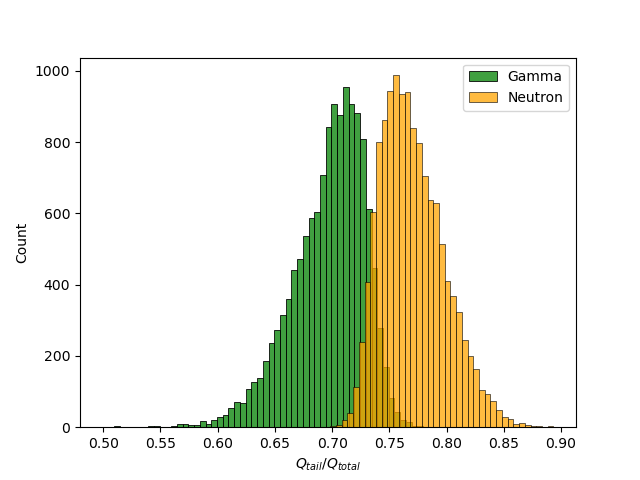

In [105]:
%matplotlib widget

# Confidence interval with 2 sigmas
# sns.histplot(dfClass0["FOM"].loc[dfClass0["FOM"] < 0.71484], binwidth = 0.005, color = 'green')
# sns.histplot(dfClass1["FOM"].loc[dfClass1["FOM"] > 0.75983], binwidth = 0.005, color = 'orange')

# Without removing the confidence interval
sns.histplot(dfClass0["FOM"], binwidth = 0.005, color = 'green')
sns.histplot(dfClass1["FOM"], binwidth = 0.005, color = 'orange')

plt.xlabel('$Q_{tail}/Q_{total}$')
plt.legend(["Gamma", "Neutron"])
# plt.xlim(0, 0.3)
plt.show()

In [106]:
np.average(dfClass1["FOM"])

0.7702008906441554

In [107]:
np.std(dfClass1["FOM"])

0.027685370281209997

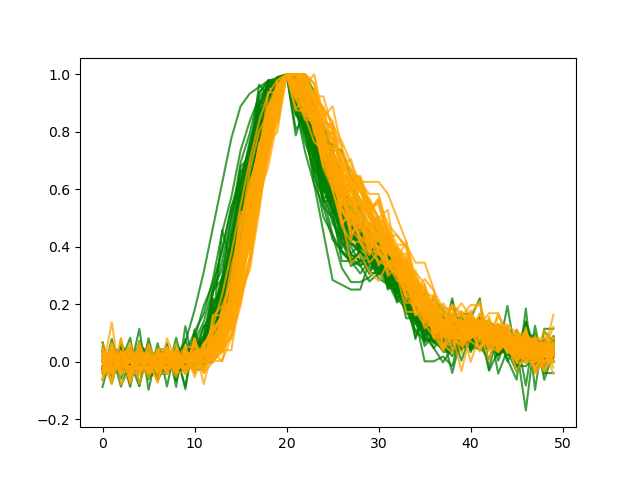

In [108]:
%matplotlib widget
plt.plot(dfClass0[dfClass0.columns[0:50]].iloc[:50].T.values, color = 'green', alpha = 0.75, label = "Gamma")
plt.plot(dfClass1[dfClass1.columns[0:50]].iloc[:50].T.values, color = 'orange', alpha = 0.75, label = "Neutron")
# plt.yscale("log")
# plt.ylim([-0.1, 0.5])
plt.show()

Estimating rise-time average slope for each event

In [109]:
def getSlope(pulse, firstSample, numSamples):
    
    slope = 0
    i = firstSample
    
    while i < firstSample + numSamples - 1:
        slope += pulse[i+1]-pulse[i]
        i += 1
        
    return slope/(numSamples - 1)
    

In [110]:
dfClass0["riseTime"] = dfClass0[dfClass0.columns[0:20]].iloc[:].apply(getSlope, args=(14, 4), axis = 1)
dfClass1["riseTime"] = dfClass1[dfClass1.columns[0:20]].iloc[:].apply(getSlope, args=(14, 4), axis = 1)

<ipython-input-110-4c36d742ce6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClass0["riseTime"] = dfClass0[dfClass0.columns[0:20]].iloc[:].apply(getSlope, args=(14, 4), axis = 1)
<ipython-input-110-4c36d742ce6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClass1["riseTime"] = dfClass1[dfClass1.columns[0:20]].iloc[:].apply(getSlope, args=(14, 4), axis = 1)


In [111]:
dfClass1

0         1         2         3         4         5         6  \
13     0.006371  0.006371  0.006371  0.006371  0.006371 -0.031846  0.044587   
23    -0.031250  0.000000 -0.031250  0.031250  0.000000  0.031250 -0.031250   
26     0.003459  0.044981  0.003459  0.003459 -0.038064  0.003459  0.003459   
28    -0.000491 -0.029918  0.028935 -0.000491  0.028935 -0.000491 -0.029918   
31    -0.063943  0.065020 -0.031702  0.032779  0.032779 -0.031702  0.032779   
...         ...       ...       ...       ...       ...       ...       ...   
51383 -0.071429 -0.001554  0.045030 -0.001554 -0.001554 -0.024846 -0.001554   
51385  0.033595  0.005983 -0.021628 -0.021628  0.005983 -0.021628  0.005983   
51387 -0.042721  0.044172  0.000726  0.000726  0.000726  0.000726  0.000726   
51388 -0.024182  0.032717 -0.024182  0.032717  0.004267  0.004267  0.061166   
51389 -0.001088 -0.001088 -0.001088 -0.022851  0.020675 -0.022851 -0.001088   

              7         8         9  ...       256       257       258  \
13     0.044587  0.006371  0.006371  ...  0.006371 -0.031846  0.044587   
23     0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.031250   
26     0.003459  0.003459  0.003459  ...  0.003459  0.044981 -0.038064   
28    -0.000491  0.028935 -0.000491  ... -0.029918  0.028935 -0.000491   
31     0.000538  0.000538  0.032779  ...  0.000538  0.000538 -0.031702   
...         ...       ...       ...  ...       ...       ...       ...   
51383  0.045030 -0.001554  0.021738  ... -0.001554 -0.024846 -0.001554   
51385 -0.021628  0.033595  0.005983  ...  0.033595  0.005983  0.005983   
51387  0.000726 -0.042721  0.044172  ... -0.042721 -0.042721  0.000726   
51388  0.004267  0.004267  0.004267  ... -0.024182  0.032717 -0.024182   
51389 -0.001088 -0.001088 -0.001088  ...  0.020675 -0.022851 -0.001088   

            259       Area  leadingArea  trailingArea       FOM  PeakValue  \
13    -0.031846  17.592693     3.414034     14.178605  0.805940  26.166700   
23     0.000000  14.031250     3.375000     10.656250  0.759465  32.000000   
26     0.003459  16.345640     2.809665     13.536002  0.828109  24.083300   
28    -0.029918  16.115492     4.109842     12.005656  0.744976  33.983300   
31     0.000538  15.808970     3.653967     12.155005  0.768868  31.016700   
...         ...        ...          ...           ...       ...        ...   
51383  0.021738  17.554077     3.276384     14.277766  0.813355  42.933300   
51385 -0.021628  16.493540     3.736784     12.756758  0.773439  36.216700   
51387  0.000726  17.263170     3.968162     13.295064  0.770137  23.016700   
51388  0.032717  16.642944     4.039830     12.603131  0.757265  35.150000   
51389 -0.001088  16.017462     4.526660     11.490754  0.717392  45.950005   

       riseTime  
13     0.165605  
23     0.114583  
26     0.152249  
28     0.166749  
31     0.128963  
...         ...  
51383  0.163044  
51385  0.165669  
51387  0.159305  
51388  0.151731  
51389  0.152339  

[13149 rows x 266 columns]

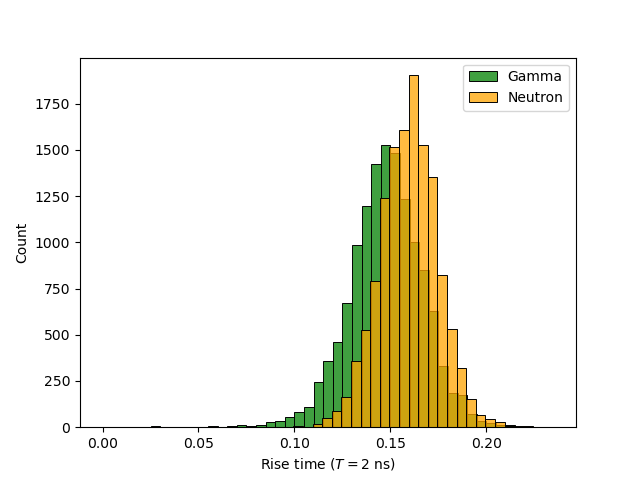

In [112]:
%matplotlib widget
# dfClass0[dfClass0.columns[0:20]].iloc[:].apply(getSlope, args=(14, 4), axis = 1)
# plt.plot(dfClass0[dfClass0.columns[:200]].loc[[51390, 51391, 51394]].T.values)
# plt.show()
sns.histplot(dfClass0["riseTime"], binwidth = 0.005, color = "green")
sns.histplot(dfClass1["riseTime"], binwidth = 0.005, color = "orange")
plt.legend(["Gamma", "Neutron"])
plt.xlabel("Rise time ($ T = 2 $ ns)")
plt.show()

### Evaluating with non-normalized peak amplitudes (energies)

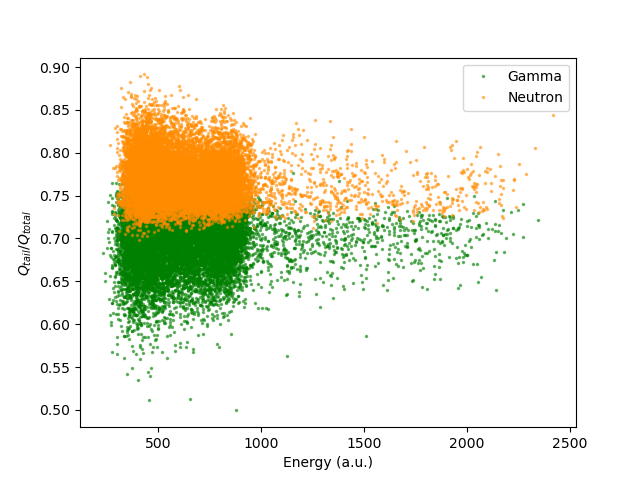

In [114]:
dfPulsesAligned.loc[dfClass0.index]

%matplotlib widget

plt.plot(dfPulsesAligned.loc[dfClass0.index]["Area"], dfClass0["FOM"], '.', color = 'green', markersize = 3, alpha = 0.5)
plt.plot(dfPulsesAligned.loc[dfClass1.index]["Area"], dfClass1["FOM"], '.', color = 'darkorange', markersize = 3, alpha = 0.5)
plt.legend(["Gamma", "Neutron"])
plt.xlabel("Energy (a.u.)")
plt.ylabel("${Q_{tail}}/{Q_{total}}$")
# plt.ylim(-0.05, 0.35)
plt.show()

### Evaluating with normalized energies (peak amplitudes)

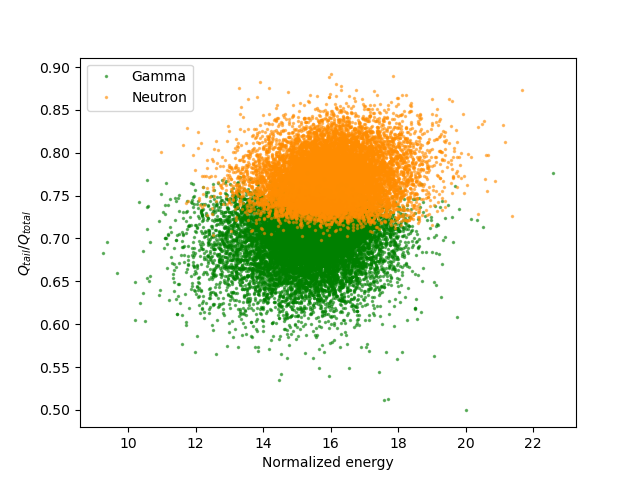

In [115]:
%matplotlib widget

plt.plot(dfClass0["Area"], dfClass0["FOM"], '.', color = 'green', markersize = 3, alpha = 0.5)
plt.plot(dfClass1["Area"], dfClass1["FOM"], '.', color = 'darkorange', markersize = 3, alpha = 0.5)
plt.legend(["Gamma", "Neutron"])
plt.xlabel("Normalized energy")
plt.ylabel("${Q_{tail}}/{Q_{total}}$")
# plt.ylim(-0.05, 0.35)
plt.show()

## Using features: $Q_{tail}/Q_{total}$ and Energy (Area)

In [4]:
GAMMA_CLASS = 0
NEUTRON_CLASS = 1

In [77]:
pulsesIndexRange = [220,500] # Gathered pulses have their peaks around sample #250
pulseLength = max(pulsesIndexRange) - min(pulsesIndexRange)
reducedPulseLength = 260 # When alignment occurs
baselineRange = range(0,60) # Number of samples to be averaged to estimate baseline on each pulse
expectedPeakPosition = 20 # We'll align the pulses and expect the peak at this sample
# leadingAreaFactor = (expectedPeakPosition / reducedPulseLength) * 2 # Hard-setting the integration limits to take only the tail into account
# trailingAreaFactor = 1 - leadingAreaFactor # Tail starts just after peak
hardTailIntegrationLimit = 20 # Only used for manual setting integration inferior tail integration range, referenced to pulse sample position

In [78]:
dfPulsesAligned = pd.read_csv('./data/output/normalizedAlignedPulses.csv', index_col = 0)
dfPulsesAligned

0         1         2         3         4         5         6  \
0      0.042120 -0.039401  0.021740  0.021740 -0.019021  0.021740 -0.039401   
5     -0.025428  0.024593 -0.025428  0.024593  0.024593 -0.000418  0.024593   
10    -0.001927 -0.001927 -0.001927 -0.001927 -0.001927 -0.001927 -0.040462   
11     0.002968 -0.014836  0.020772 -0.014836  0.038576 -0.014836  0.002968   
12     0.002376  0.002376 -0.017984  0.002376  0.002376  0.022736 -0.017984   
...         ...       ...       ...       ...       ...       ...       ...   
51393  0.037037  0.000000  0.000000  0.000000  0.000000  0.000000  0.037037   
51394  0.066389 -0.089213  0.004148  0.004148  0.035269  0.035269 -0.026972   
51395  0.001848  0.001848  0.001848 -0.016636  0.001848 -0.016636  0.020333   
51396  0.005048  0.005048  0.005048  0.005048  0.005048  0.005048 -0.081469   
51397  0.000708 -0.020554  0.021970 -0.041815  0.021970 -0.020554  0.000708   

              7         8         9  ...       255       256       257  \
0      0.001359  0.021740 -0.039401  ...  0.001359  0.021740  0.001359   
5      0.024593 -0.025428  0.049603  ... -0.000418 -0.000418 -0.025428   
10     0.036609 -0.040462 -0.001927  ...  0.036609 -0.001927  0.036609   
11    -0.014836  0.002968  0.020772  ... -0.014836  0.002968  0.002968   
12     0.043095  0.002376  0.002376  ...  0.022736 -0.017984  0.022736   
...         ...       ...       ...  ...       ...       ...       ...   
51393  0.000000  0.037037  0.000000  ... -0.037037  0.037037 -0.037037   
51394  0.004148  0.004148 -0.026972  ... -0.026972  0.004148  0.004148   
51395  0.001848  0.001848  0.020333  ... -0.035120  0.038817 -0.016636   
51396  0.048307  0.005048  0.048307  ...  0.048307  0.005048  0.048307   
51397  0.021970  0.000708  0.000708  ... -0.041815  0.043231 -0.041815   

            258       259       Area  leadingArea  trailingArea       FOM  \
0      0.001359  0.001359  15.944446     4.347837     11.596608  0.727313   
5     -0.000418 -0.000418  15.723002     4.493526     11.229476  0.714207   
10     0.036609 -0.001927  14.412359     4.238921     10.173438  0.705883   
11     0.020772  0.002968  15.887359     5.418406     10.468952  0.658949   
12     0.002376  0.022736  15.358144     3.203269     12.154876  0.791429   
...         ...       ...        ...          ...           ...       ...   
51393  0.000000  0.000000  16.185175     4.814815     11.370361  0.702517   
51394  0.004148  0.004148  14.678199     3.786291     10.891905  0.742047   
51395  0.020333  0.020333  15.489791     4.177449     11.312343  0.730310   
51396  0.005048  0.048307  17.707724     3.561668     14.146024  0.798864   
51397  0.000708  0.021970  16.279028     4.649174     11.629872  0.714407   

       PeakValue  
0        49.0667  
5        39.9833  
10       25.9500  
11       56.1667  
12       49.1167  
...          ...  
51393    27.0000  
51394    32.1333  
51395    54.1000  
51396    23.1167  
51397    47.0333  

[36832 rows x 265 columns]

In [79]:
npPulsesFeatures = pd.concat([dfPulsesAligned["Area"], dfPulsesAligned["FOM"]], axis = 1)
npPulsesFeatures = npPulsesFeatures.to_numpy()
len(npPulsesFeatures)

36832

In [80]:
kmeansFeatures = KMeans(n_clusters = 2, random_state = 0, algorithm="full", init='k-means++').fit(npPulsesFeatures)
classesFeatures = kmeansFeatures.labels_
dfPulsesKMfeatures = pd.DataFrame(npPulsesFeatures, columns = ["Area", "FOM"])
dfPulsesKMfeatures['class'] = classesFeatures
dfPulsesKMfeatures

Area       FOM  class
0      15.944446  0.727313      1
1      15.723002  0.714207      1
2      14.412359  0.705883      0
3      15.887359  0.658949      1
4      15.358144  0.791429      0
...          ...       ...    ...
36827  16.185175  0.702517      1
36828  14.678199  0.742047      0
36829  15.489791  0.730310      0
36830  17.707724  0.798864      1
36831  16.279028  0.714407      1

[36832 rows x 3 columns]

In [81]:
dfClass0Feat = dfPulsesKMfeatures.loc[dfPulsesKMfeatures["class"] == 0]
dfClass1Feat = dfPulsesKMfeatures.loc[dfPulsesKMfeatures["class"] == 1]

# dfClass0.to_csv("./data/output/kmClass0.csv")
# dfClass1.to_csv("./data/output/kmClass1.csv")


### Aligned pulses FOM

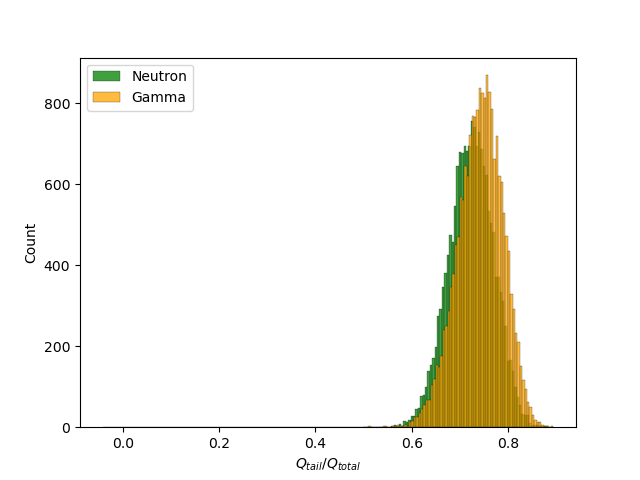

In [86]:
%matplotlib widget
sns.histplot(dfClass0Feat["FOM"], binwidth = 0.005, color = 'green')
sns.histplot(dfClass1Feat["FOM"], binwidth = 0.005, color = 'orange')
plt.xlabel('$Q_{tail}/Q_{total}$')
plt.legend(["Neutron", "Gamma"])
# plt.xlim(0, 0.3)
plt.show()

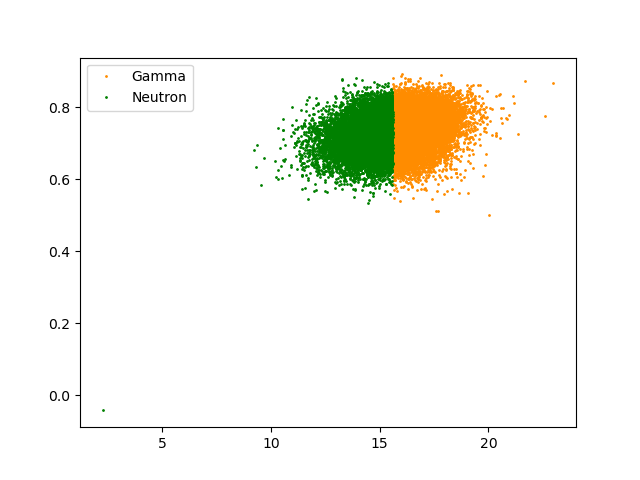

In [87]:
%matplotlib widget
plt.plot(dfClass1Feat["Area"], dfClass1Feat["FOM"], '.', color = 'darkorange', markersize = 2)
plt.plot(dfClass0Feat["Area"], dfClass0Feat["FOM"], '.', color = 'green', markersize = 2)
plt.legend(["Gamma", "Neutron"])
# plt.ylim(-0.05, 0.35)
plt.show()